<a href="https://colab.research.google.com/github/junting-huang/academic_jobs/blob/main/academic_job_culstering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Academic Job Culstering

**All Jobs Were Posted on Academic Jobs Wiki (2015-2020)**

This is an example of text clustering of all job descriptions in the following three categories (1) Chinese Literature and Culture, (2) Comparative Literature, and (3) Film and Media Studies

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_files

random_state = 0 

DATA_DIR = "./drive/MyDrive/job_data/"
data = load_files(DATA_DIR, encoding="utf-8", decode_error="replace", random_state=random_state)
df = pd.DataFrame(list(zip(data['data'], data['target'])), columns=['text', 'label'])
df.head()

,text,label
0,the school of film and media at purchase colle...,2
1,kalamazoo college seeks applications for a ten...,0
2,the department of world languages & literature...,0
3,the department of global languages and literat...,0
4,the department of communication arts at the un...,2


In [ ]:
vec = TfidfVectorizer(stop_words="english")
vec.fit(df.text.values)
features = vec.transform(df.text.values)

In [ ]:
cls = MiniBatchKMeans(n_clusters=3, random_state=random_state)
cls.fit(features)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=3, n_init=3, random_state=0, reassignment_ratio=0.01,
                tol=0.0, verbose=0)

In [ ]:
cls.predict(features)

cls.labels_

array([0, 1, 1, 1, 0, 1, 0, 1, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 2, 0, 1, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 2, 0, 2, 2, 0, 2, 1, 0, 0, 2, 0, 0, 2, 1, 0,
       2, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 2, 1, 0, 1, 2,
       0, 0, 2, 0, 0, 0, 2, 1, 0, 2, 1, 0, 0, 0, 2, 1, 2, 0, 1, 0, 1, 0,
       2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 0, 1, 2, 0, 0, 1,
       0, 0, 0, 2, 0, 1, 1, 1, 0, 1, 2, 2, 0, 1, 0, 0, 1, 0, 2, 0, 2, 2,
       0, 0, 2, 0, 2, 0, 1, 0, 0, 2, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       1, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 2, 0, 1, 2, 2, 0,
       1, 2, 0, 0, 2, 0, 0, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2,
       0, 2, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 1, 0, 2,
       0, 2, 0, 0, 2, 2, 0, 0, 2, 1, 1, 2, 0, 1, 1,

In [ ]:
# reduce the features to 2D
pca = PCA(n_components=2, random_state=random_state)
reduced_features = pca.fit_transform(features.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(cls.cluster_centers_)

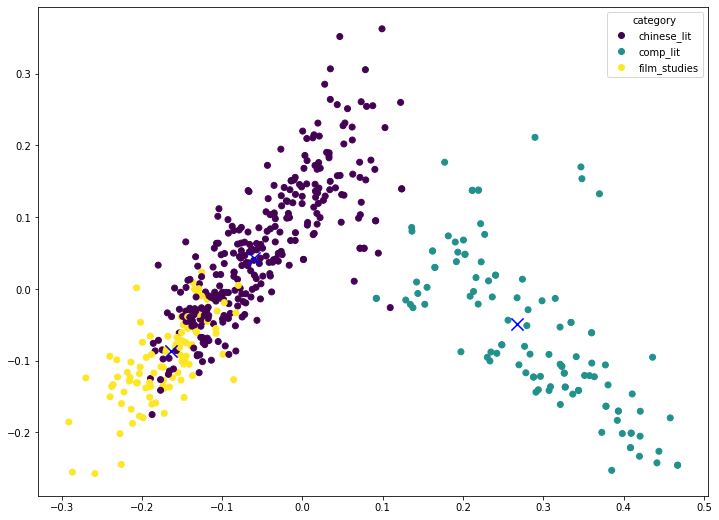

In [ ]:
plt.figure(figsize=(12,9))
scatter = plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(features))
plt.legend(handles=scatter.legend_elements()[0], 
           labels=['chinese_lit','comp_lit','film_studies'],
           title="category")
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')